<a href="https://colab.research.google.com/github/chumjikim/CentralizedTest/blob/master/2%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%EC%BD%94%EB%93%9C(Pytorch)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data loading

from sklearn.datasets import load_breast_cancer

# (K2020009) sklearn.datasets 모듈에서 제공하는 sample dataset 중에 breast_cancer 데이터를 로드한다.

cancer = load_breast_cancer() # (K2020009) 데이터 불러오기
data = cancer.data # (K2020009) 속성데이터
labels = cancer.target # (K2020009) 클래스데이터

print(data)
print(labels) 
print(data.shape) # (K2020009) 전체 행과 열의 갯수 출력

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [0]:
# Split data

from sklearn.model_selection import train_test_split
# (K2020009) train test split 함수를 사용해 train set과 test set으로 분리 ( test size = 10%)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1) 
print(len(x_train), len(x_test), type(x_train))

print(x_test)
print(y_test)

512 57 <class 'numpy.ndarray'>
[[8.219e+00 2.070e+01 5.327e+01 ... 7.879e-02 3.322e-01 1.486e-01]
 [1.613e+01 1.788e+01 1.070e+02 ... 1.864e-01 4.270e-01 1.233e-01]
 [2.175e+01 2.099e+01 1.473e+02 ... 1.841e-01 2.833e-01 8.858e-02]
 ...
 [1.701e+01 2.026e+01 1.097e+02 ... 1.096e-01 3.275e-01 6.469e-02]
 [1.953e+01 1.890e+01 1.295e+02 ... 1.980e-01 2.968e-01 9.929e-02]
 [2.020e+01 2.683e+01 1.337e+02 ... 2.152e-01 3.271e-01 7.632e-02]]
[1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0]


In [0]:
# Convert to tensor

import torch
import torch.nn as nn # (K2020009) Deep learning model에 필요한 모듈이 모아져 있는 패키지
import torch.nn.functional as F # (K2020009) nn과 같은 모듈이 모아져 있지만 함수의 input으로 반드시 연산이 되어야 하는 값을 받는다.
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable # (K2020009) autograd는 텐서의 연산에 대해 자동으로 미분값을 구해주는 기능을 한다.
# (K2020009) 필요한 패키지 import

x_train = Variable(torch.from_numpy(x_train).float()) # (K2020009) x_train값 미분 및 torch의 tensor로 변환
y_train = Variable(torch.from_numpy(y_train).float()) # (K2020009) y_train값 미분 및 torch의 tensor로 변환

x_test = Variable(torch.from_numpy(x_test).float()) # (K2020009) x_test값 미분 및 torch의 tensor로 변환
y_test = Variable(torch.from_numpy(y_test).float()) # (K2020009) y_test값 미분 및 torch의 tensor로 변환

print(type(x_train))

<class 'torch.Tensor'>
tensor([[1.2050e+01, 2.2720e+01, 7.8750e+01,  ..., 1.0920e-01, 2.1910e-01,
         9.3490e-02],
        [1.1690e+01, 2.4440e+01, 7.6370e+01,  ..., 1.3080e-01, 2.8030e-01,
         9.9700e-02],
        [8.9500e+00, 1.5760e+01, 5.8740e+01,  ..., 3.8460e-02, 1.6520e-01,
         7.7220e-02],
        ...,
        [8.5970e+00, 1.8600e+01, 5.4090e+01,  ..., 0.0000e+00, 3.1420e-01,
         8.1160e-02],
        [1.2560e+01, 1.9070e+01, 8.1920e+01,  ..., 9.2650e-02, 2.1210e-01,
         7.1880e-02],
        [1.6650e+01, 2.1380e+01, 1.1000e+02,  ..., 2.0950e-01, 3.6130e-01,
         9.5640e-02]])


In [0]:
# Generating dataset

train_set = TensorDataset(x_train, y_train) # (K2020009) x_train, y_train의 값을 이용하여 dataset 생성
test_set = TensorDataset(x_test, y_test)  # (K2020009) x_test, y_test의 값을 이용하여 dataset 생성

train_loader = DataLoader(train_set, batch_size = 8, shuffle=True) # (K2020009) data 순서를 섞어서 8개씩 데이터를 반환하는 train_loader

In [0]:
# Construct model

class Model(nn.Module): # (K2020009) nn.Module은 모든 신경망 모듈의 기본이 되는 클래스로 레이어, 함수등을 정의
# (K2020009) class 형태의 모델은 항상 nn.Module 을 상속받아야 하며, super(모델명, self).__init__() 을 통해 nn.Module.__init__() 을 실행시키는 코드가 필요함.

  def __init__(self): # (K2020009) 초기화 함수
    super().__init__()
    
    self.layer1 = nn.Linear(30, 128) 
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 32)
    self.layer4 = nn.Linear(32, 16)
    self.layer5 = nn.Linear(16, 1)
    self.act = nn.ReLU()

# (K2020009) 1~128의 크기를 갖는 5개 층의 신경망 모델 생성

  def forward(self,x):
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))
    x = self.act(self.layer4(x))
    x = self.layer5(x)
    x = torch.sigmoid(x)

# (K2020009) sigmoid 함수 적용

    return x

model = Model()
print(model)


Model(
  (layer1): Linear(in_features=30, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=16, bias=True)
  (layer5): Linear(in_features=16, out_features=1, bias=True)
  (act): ReLU()
)


In [0]:
# Configure optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# (K2020009) SGD optimizer 사용

In [0]:
# Training

epochs = (K2020009) 200 # 200회 학습
losses = list()
accuracies = list()

for epoch in range(epochs):
  epoch_loss = 0  
  epoch_accuracy = 0
  for x, y in train_loader:
  
    optimizer.zero_grad() // # (K2020009) 변화도를 0으로 만들고
    output = model(x)

    loss = F.binary_cross_entropy(output, y)
    loss.backward() # (K2020009) 역전파 단계를 수행하고
    
    optimizer.step() # (K2020009) 가중치를 갱신함.
    
    output[output>=0.5] = 1
    output[output<0.5] = 0
    accuracy = sum(sum(y.data.numpy() == output.data.T.numpy()))

    epoch_loss += loss.item()
    epoch_accuracy += accuracy
  

  epoch_loss /= len(train_loader)
  epoch_accuracy /= len(x_train)
  print(str(epoch+1).zfill(3), "loss :", round(epoch_loss,4),"accuracy :", round(epoch_accuracy,4))
  
  losses.append(epoch_loss)
  accuracies.append(epoch_accuracy)

  

001 loss : 0.638 accuracy : 0.6504
002 loss : 0.5626 accuracy : 0.7383


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  from ipykernel import kernelapp as app


003 loss : 0.524 accuracy : 0.7793
004 loss : 0.519 accuracy : 0.8008
005 loss : 0.4387 accuracy : 0.8457
006 loss : 0.4085 accuracy : 0.8652
007 loss : 0.4152 accuracy : 0.8535
008 loss : 0.3691 accuracy : 0.8652
009 loss : 0.3862 accuracy : 0.8477
010 loss : 0.3659 accuracy : 0.8594
011 loss : 0.3831 accuracy : 0.8477
012 loss : 0.3082 accuracy : 0.8828
013 loss : 0.3619 accuracy : 0.8457
014 loss : 0.3175 accuracy : 0.875
015 loss : 0.3338 accuracy : 0.8672
016 loss : 0.318 accuracy : 0.877
017 loss : 0.2875 accuracy : 0.8848
018 loss : 0.3322 accuracy : 0.875
019 loss : 0.2935 accuracy : 0.8984
020 loss : 0.3008 accuracy : 0.8691
021 loss : 0.2964 accuracy : 0.8926
022 loss : 0.2807 accuracy : 0.9062
023 loss : 0.2456 accuracy : 0.9004
024 loss : 0.262 accuracy : 0.9121
025 loss : 0.2852 accuracy : 0.8965
026 loss : 0.2825 accuracy : 0.877
027 loss : 0.2993 accuracy : 0.8789
028 loss : 0.2535 accuracy : 0.9141
029 loss : 0.2805 accuracy : 0.9004
030 loss : 0.2849 accuracy : 0.877
0

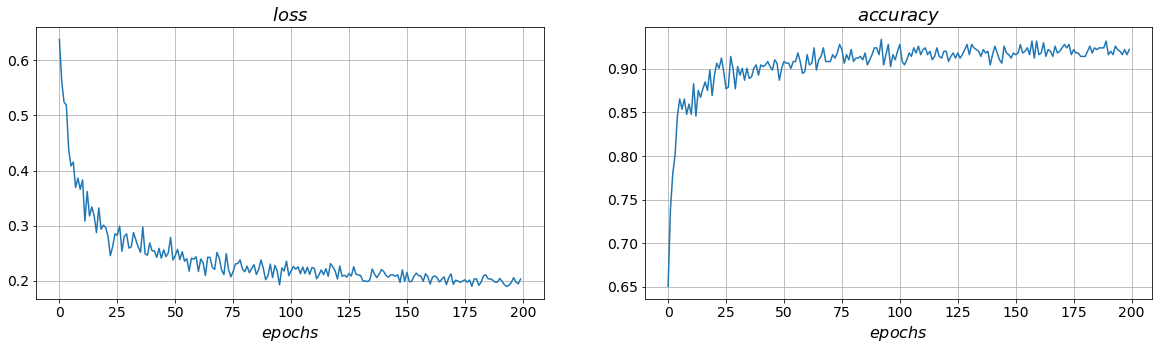

In [0]:
# Plot result

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5)) # (K2020009) 그림(figure)의 크기 (가로=20,세로=5) 인치 단위

plt.subplots_adjust(wspace=0.2) # (K2020009) 서브 플롯 (소스) 사이의 간격을 0.2로 조정하여 변경

plt.subplot(1,2,1) # (K2020009) 행의 수/ 열의 수/ 인덱스 값
plt.title("$loss$",fontsize = 18)
plt.plot(losses)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.subplot(1,2,2)
plt.title("$accuracy$", fontsize = 18)
plt.plot(accuracies)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [0]:
# Test

output = model(x_test)
output[output>=0.5] = 1
output[output<0.5] = 0

accuracy = sum(sum(y_test.data.numpy() == output.data.T.numpy())) /len(y_test)

print("test_set accuracy :", round(accuracy,4))

test_set accuracy : 0.9298
